<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


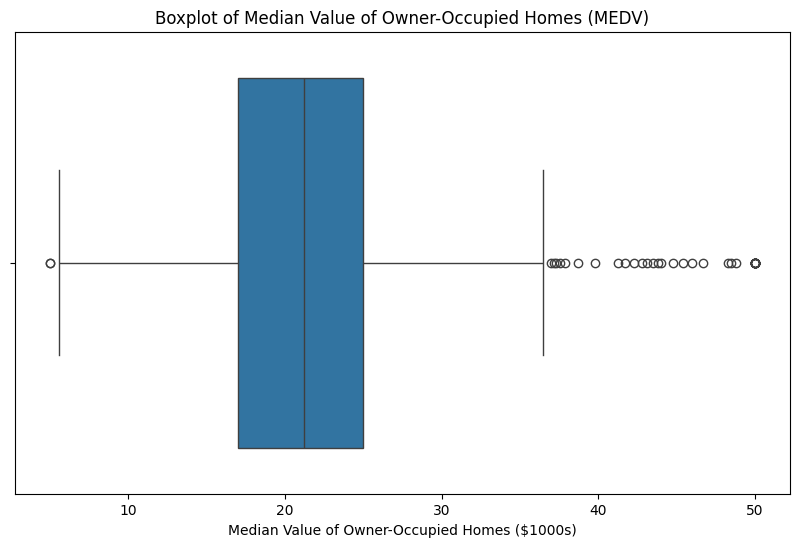

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='MEDV', data=df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


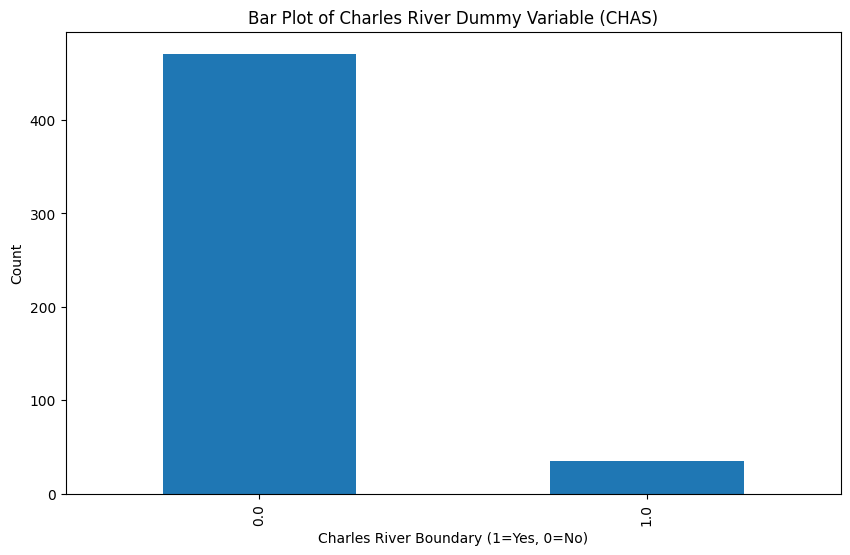

In [14]:
plt.figure(figsize=(10, 6))
df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Charles River Dummy Variable (CHAS)')
plt.xlabel('Charles River Boundary (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


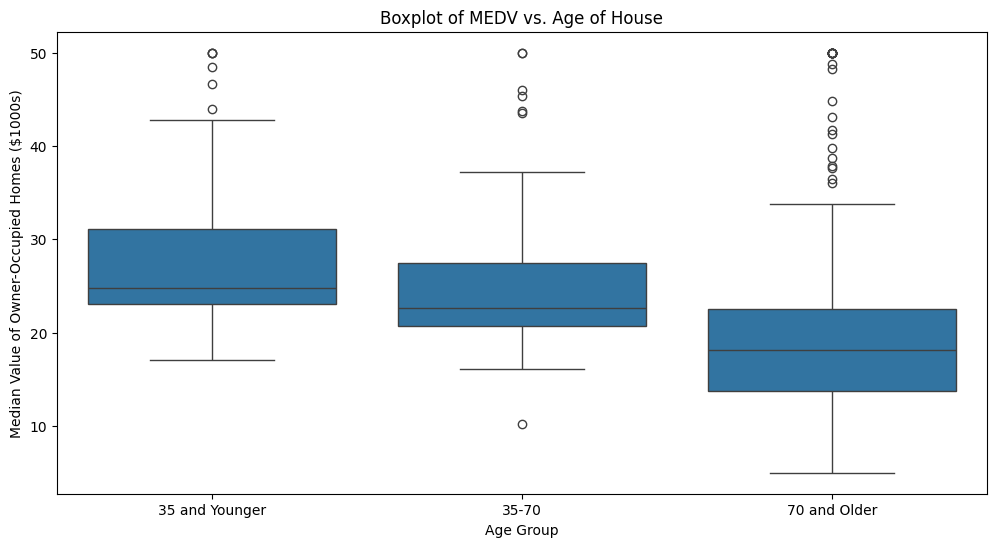

In [15]:

df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '35-70', '70 and Older'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('Boxplot of MEDV vs. Age of House')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


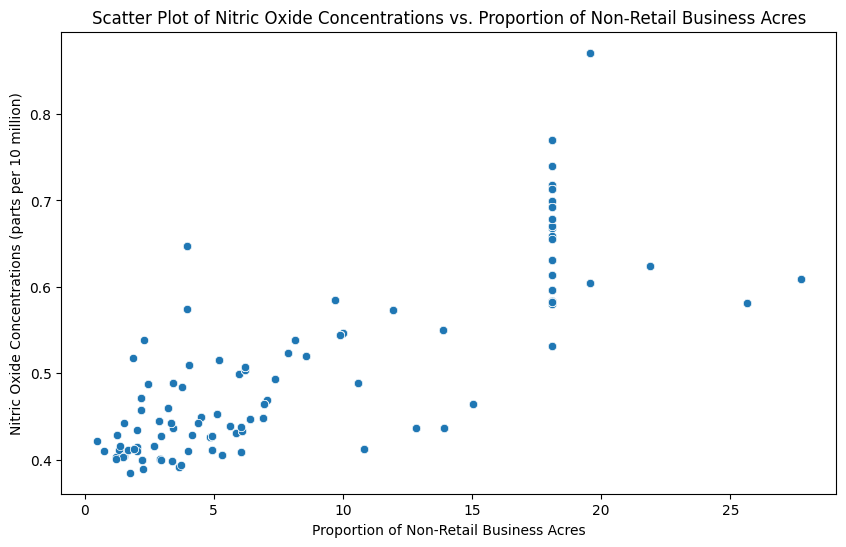

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.show()


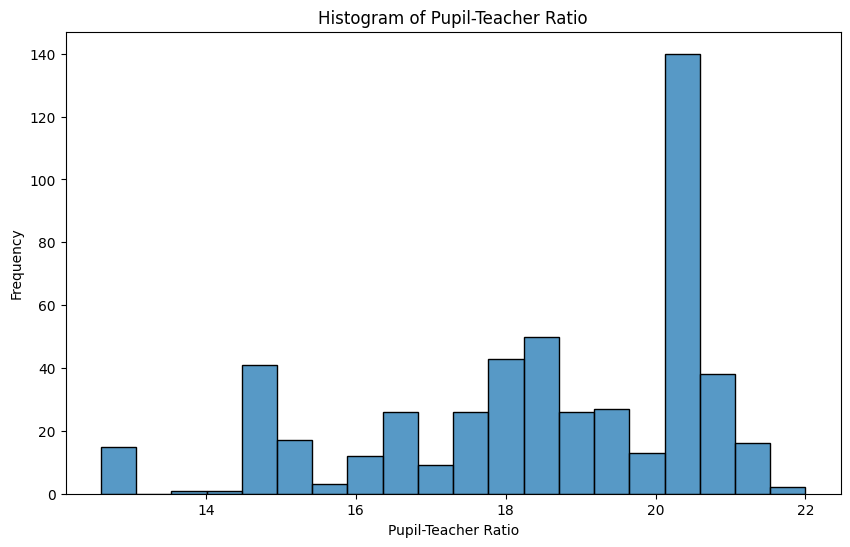

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PTRATIO'], bins=20, kde=False)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [18]:
from scipy.stats import ttest_ind

medv_chas = df[df['CHAS'] == 1]['MEDV']
medv_no_chas = df[df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(medv_chas, medv_no_chas)

print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [19]:
from scipy.stats import f_oneway

medv_age_groups = [df[df['AGE_Group'] == group]['MEDV'] for group in df['AGE_Group'].cat.categories]
f_stat, p_value = f_oneway(*medv_age_groups)

print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [21]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['NOX'], df['INDUS'])

print(f'Correlation Coefficient: {corr_coef}, P-value: {p_value}')


Correlation Coefficient: 0.7636514469209157, P-value: 7.91336106123623e-98


In [22]:
import statsmodels.api as sm

X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        01:43:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0